<a href="https://colab.research.google.com/github/Sahariya55/Behavior-Analysis-using-Descriptive-Statistics/blob/master/Applied_Statistics_Project_Mid_Summative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import norm , poisson,skewnorm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Dataset Loading

In [2]:
# Mounting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load DataSet
path='/content/drive/MyDrive/Colab Notebooks/capstone project/Module-5/Mid_summative/Superstore Marketing Data - Sheet1.csv'
df = pd.read_csv(path)

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(2240, 22)

In [6]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
num_duplicates=df.duplicated().sum()
print("Total number of duplicate rows :",num_duplicates)

df.drop_duplicates(inplace=True)
unique_rows=df.shape[0]
print("Total number of unique rows :",unique_rows)

Total number of duplicate rows : 0
Total number of unique rows : 2240


### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count in each column
missing_values_count=df.isnull().sum()
missing_values_count


Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [10]:
# Replacing "########" with NaN in the "Dt_Customer" column
df['Dt_Customer'] = df['Dt_Customer'].replace('########', pd.NA)

# Drop rows with missing values in the "Dt_Customer" column
df = df.dropna(subset=['Dt_Customer'])
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
5,7348,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,...,240,32,43,1,4,7,5,2,1,0
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,...,15,34,65,1,10,10,7,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,3363,1974,2n Cycle,Married,20130.0,0,0,3/17/2014,99,0,...,7,6,12,1,1,0,3,8,0,0
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,9/26/2013,99,15,...,7,4,25,1,2,1,2,5,0,1
2234,9977,1973,Graduation,Divorced,78901.0,0,1,9/17/2013,99,321,...,33,26,34,3,9,3,5,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0


In [11]:
# Check for missing values in the Income column
missing_values = df['Income'].isnull().sum()
print("Number of missing values in Income column:", missing_values)

Number of missing values in Income column: 13


In [12]:
# Dropping 'Income' column as it has maximum number of null or missing values
df.dropna(subset=['Income'], inplace=True)
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
5,7348,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,...,240,32,43,1,4,7,5,2,1,0
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,...,15,34,65,1,10,10,7,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,3363,1974,2n Cycle,Married,20130.0,0,0,3/17/2014,99,0,...,7,6,12,1,1,0,3,8,0,0
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,9/26/2013,99,15,...,7,4,25,1,2,1,2,5,0,1
2234,9977,1973,Graduation,Divorced,78901.0,0,1,9/17/2013,99,321,...,33,26,34,3,9,3,5,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0


In [13]:
#Converting datatype of Dt_Customer to datetime
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

In [14]:
df["Age"] = 2024 - pd.to_datetime(df["Year_Birth"], format="%Y").apply(lambda x: x.year)

In [15]:
df["Age"].sort_values().tail()

1475     81
1740     83
2233    124
827     125
513     131
Name: Age, dtype: int64

In [16]:
#Dropping those rows where age of the person have exceeded 100
df.drop(df[df["Age"]>100].index,inplace = True)
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,189,218,1,4,4,6,1,1,0,54
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,37,1,7,3,7,5,1,0,63
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,30,1,3,2,5,2,0,0,66
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,32,43,1,4,7,5,2,1,0,66
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,...,34,65,1,10,10,7,6,1,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,2106,1974,2n Cycle,Married,20130.0,0,0,2014-03-17,99,0,...,6,12,1,1,0,3,8,0,0,50
2230,3363,1974,2n Cycle,Married,20130.0,0,0,2014-03-17,99,0,...,6,12,1,1,0,3,8,0,0,50
2234,9977,1973,Graduation,Divorced,78901.0,0,1,2013-09-17,99,321,...,26,34,3,9,3,5,4,0,0,51
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,8,16,1,1,0,3,8,0,0,47


### Data Wrangling

In [17]:
#Presenting calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308,1308.000000,1308.000000,1308.000000,1308.000000,...,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,5445.146024,1968.856269,51409.820336,0.435780,0.502294,2013-07-19 02:31:55.596330240,49.294343,302.906728,25.198777,162.650612,...,26.932722,43.783639,2.320336,4.085627,2.595566,5.801223,5.415138,0.152141,0.008410,55.143731
min,1.000000,1941.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000
25%,2737.500000,1959.000000,35434.750000,0.000000,0.000000,2013-01-25 18:00:00,24.750000,23.000000,1.000000,15.000000,...,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.000000,47.000000
50%,5230.000000,1970.000000,50442.000000,0.000000,0.000000,2013-07-21 00:00:00,50.000000,171.500000,7.000000,66.000000,...,8.000000,25.000000,2.000000,4.000000,1.000000,5.000000,6.000000,0.000000,0.000000,54.000000
75%,8204.750000,1977.000000,68179.500000,1.000000,1.000000,2014-01-17 00:00:00,74.000000,495.250000,31.000000,217.000000,...,32.000000,54.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,65.000000
max,11188.000000,1996.000000,157146.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1492.000000,197.000000,1725.000000,...,262.000000,249.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,83.000000
std,3230.434597,11.615525,20960.032649,0.530339,0.542736,NaN,28.791280,339.135952,38.521075,219.607191,...,41.065179,51.898360,1.898491,2.710518,2.833974,3.269614,2.432813,0.359295,0.091353,11.615525


In [18]:
#checking datatype of each column
df.dtypes

Id                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Response                        int64
Complain                        int64
Age                             int64
dtype: object

### The Distribution of Customer Demographics

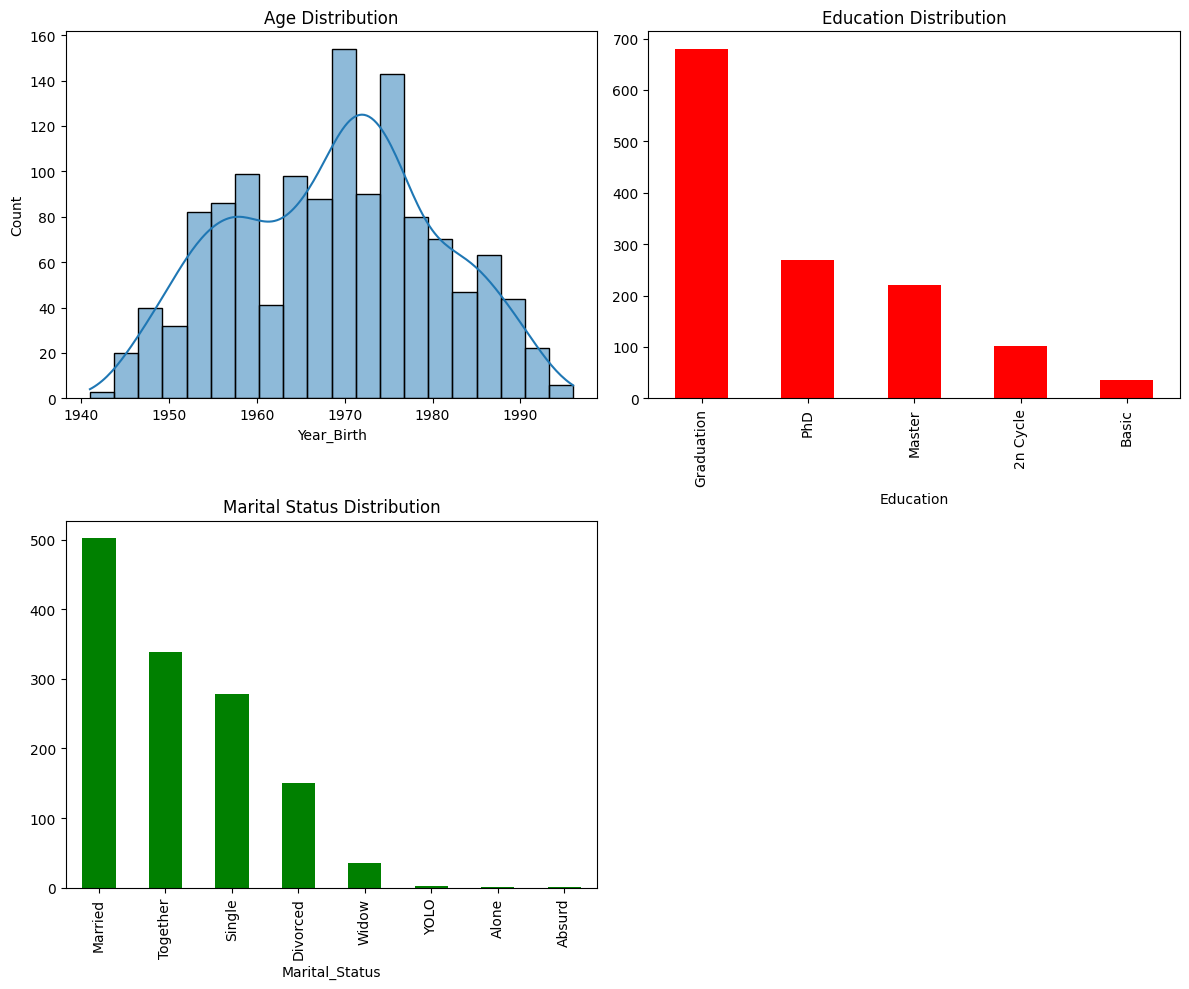

In [19]:
# Set up the figure
plt.figure(figsize=(12, 10))

# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Year_Birth'], bins=20, kde=True)
plt.title("Age Distribution")

# Education distribution
plt.subplot(2, 2, 2)
df['Education'].value_counts().plot(kind='bar', color='r')
plt.title('Education Distribution')

# Marital Status distribution
plt.subplot(2, 2, 3)
df['Marital_Status'].value_counts().plot(kind='bar', color='g')
plt.title('Marital Status Distribution')

# Show the plots
plt.tight_layout()
plt.show()

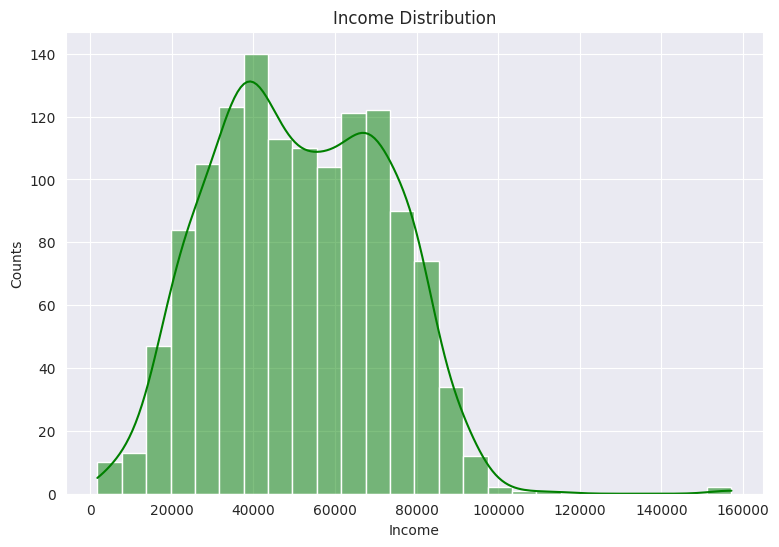

In [20]:
# Set the style for the plot
sns.set_style('darkgrid')

# Set up the figure with specified size
plt.figure(figsize=(9, 6))

# Plotting Income Distribution
sns.histplot(df['Income'], kde=True, color='green')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Counts')

# Display the plot
plt.show()


##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [21]:
#Presenting calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308,1308.000000,1308.000000,1308.000000,1308.000000,...,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,5445.146024,1968.856269,51409.820336,0.435780,0.502294,2013-07-19 02:31:55.596330240,49.294343,302.906728,25.198777,162.650612,...,26.932722,43.783639,2.320336,4.085627,2.595566,5.801223,5.415138,0.152141,0.008410,55.143731
min,1.000000,1941.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000
25%,2737.500000,1959.000000,35434.750000,0.000000,0.000000,2013-01-25 18:00:00,24.750000,23.000000,1.000000,15.000000,...,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.000000,47.000000
50%,5230.000000,1970.000000,50442.000000,0.000000,0.000000,2013-07-21 00:00:00,50.000000,171.500000,7.000000,66.000000,...,8.000000,25.000000,2.000000,4.000000,1.000000,5.000000,6.000000,0.000000,0.000000,54.000000
75%,8204.750000,1977.000000,68179.500000,1.000000,1.000000,2014-01-17 00:00:00,74.000000,495.250000,31.000000,217.000000,...,32.000000,54.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,65.000000
max,11188.000000,1996.000000,157146.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1492.000000,197.000000,1725.000000,...,262.000000,249.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,83.000000
std,3230.434597,11.615525,20960.032649,0.530339,0.542736,NaN,28.791280,339.135952,38.521075,219.607191,...,41.065179,51.898360,1.898491,2.710518,2.833974,3.269614,2.432813,0.359295,0.091353,11.615525


In [22]:
#checking datatype of each column
df.dtypes

Id                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Response                        int64
Complain                        int64
Age                             int64
dtype: object

In [23]:
# Add a column named 'total_spending' in the main DataFrame
df['total_spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
#Look of the colomn

df.iloc[ 0:,-1: ]

,total_spending
0,1190
1,577
2,251
5,1192
6,1215
...,...
2229,34
2230,34
2234,734
2236,55


In [24]:
# Extract relevant columns
key_var_1 = df[['Income', 'Recency', 'total_spending']]

# Store the statistics in a dictionary
statistics_1 = {
    "Variable": key_var_1.columns.tolist(),
    "Mean": key_var_1.mean().tolist(),
    "Median": key_var_1.median().tolist(),
    "Std Deviation": key_var_1.std().tolist(),
    "Variance": key_var_1.var().tolist()
}

# Convert the dictionary to a DataFrame
df_stats_1 = pd.DataFrame(statistics_1)

# Print general statistics
print("General Stats - 1st:")
df_stats_1


General Stats - 1st:


,Variable,Mean,Median,Std Deviation,Variance
0,Income,51409.820336,50442.0,20960.032649,4.393230e+08
1,Recency,49.294343,50.0,28.791280,8.289378e+02
2,total_spending,597.937309,359.5,601.496782,3.617984e+05


In [25]:
# Describe the key variables to find the statistical values
key_var_1.describe()


,Income,Recency,total_spending
count,1308.000000,1308.000000,1308.000000
mean,51409.820336,49.294343,597.937309
std,20960.032649,28.791280,601.496782
min,1730.000000,0.000000,5.000000
25%,35434.750000,24.750000,67.000000
50%,50442.000000,50.000000,359.500000
75%,68179.500000,74.000000,1038.250000
max,157146.000000,99.000000,2525.000000


In [26]:
#Calculating the Mode
key_var_1.mode().transpose()

,0,1
Income,7500.0,35860.0
Recency,65.0,NaN
total_spending,22.0,NaN


In [27]:

# Extract relevant columns
key_var_2 = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

# Store the statistics in a dictionary
statistics_2 = {
    "Variable": key_var_2.columns.tolist(),
    "Mean": key_var_2.mean().tolist(),
    "Median": key_var_2.median().tolist(),
    "Std Deviation": key_var_2.std().tolist(),
    "Variance": key_var_2.var().tolist()
}

# Convert the dictionary to a DataFrame
df_stats_2 = pd.DataFrame(statistics_2)

# Print amount spend statistics
print("Amount Spend Statistics:")
df_stats_2


Amount Spend Statistics:


,Variable,Mean,Median,Std Deviation,Variance
0,MntWines,302.906728,171.5,339.135952,115013.194048
1,MntFruits,25.198777,7.0,38.521075,1483.873235
2,MntMeatProducts,162.650612,66.0,219.607191,48227.318538
3,MntFishProducts,36.464832,11.0,54.488028,2968.945204
4,MntSweetProducts,26.932722,8.0,41.065179,1686.348951
5,MntGoldProds,43.783639,25.0,51.898360,2693.439763


In [28]:
#Finding mode of 2nd key variable which is TOtal amount spend of each items:
key_var_2.mode().transpose()

,0
MntWines,2
MntFruits,0
MntMeatProducts,11
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,3


In [30]:

# Extract relevant columns
key_var_3 = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

# Calculate statistics
statistics_3 = {
    "Variable": key_var_3.columns.tolist(),
    "Mean": key_var_3.mean().tolist(),
    "Median": key_var_3.median().tolist(),
    "Std Deviation": key_var_3.std().tolist(),
    "Variance": key_var_3.var().tolist()
}

# Convert statistics to DataFrame
df_stats_3 = pd.DataFrame(statistics_3)

# Print purchase quantity statistics
print("Purchase Quantity Statistics:")
df_stats_3


Purchase Quantity Statistics:


,Variable,Mean,Median,Std Deviation,Variance
0,NumDealsPurchases,2.320336,2.0,1.898491,3.604269
1,NumWebPurchases,4.085627,4.0,2.710518,7.346909
2,NumCatalogPurchases,2.595566,1.0,2.833974,8.031411
3,NumStorePurchases,5.801223,5.0,3.269614,10.690373
4,NumWebVisitsMonth,5.415138,6.0,2.432813,5.918577


In [31]:
# Find the mode of the purchase quantity columns and transpose the result
key_var_3.mode().transpose()

,0
NumDealsPurchases,1
NumWebPurchases,1
NumCatalogPurchases,0
NumStorePurchases,3
NumWebVisitsMonth,7


## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

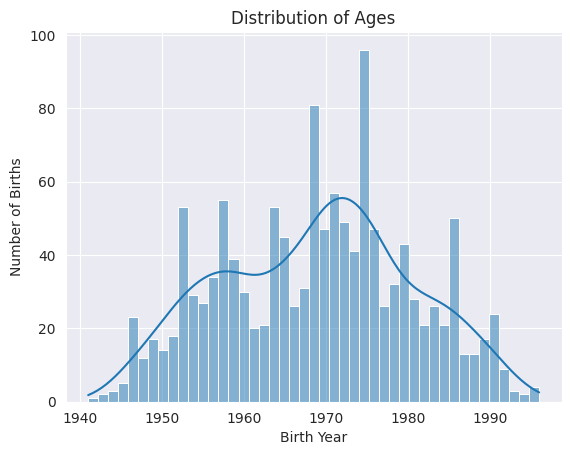

In [32]:
# Plot the distribution of ages according to birth year
sns.histplot(df['Year_Birth'], bins=45, kde=True)
plt.title("Distribution of Ages")
plt.xlabel("Birth Year")
plt.ylabel("Number of Births")
plt.show()

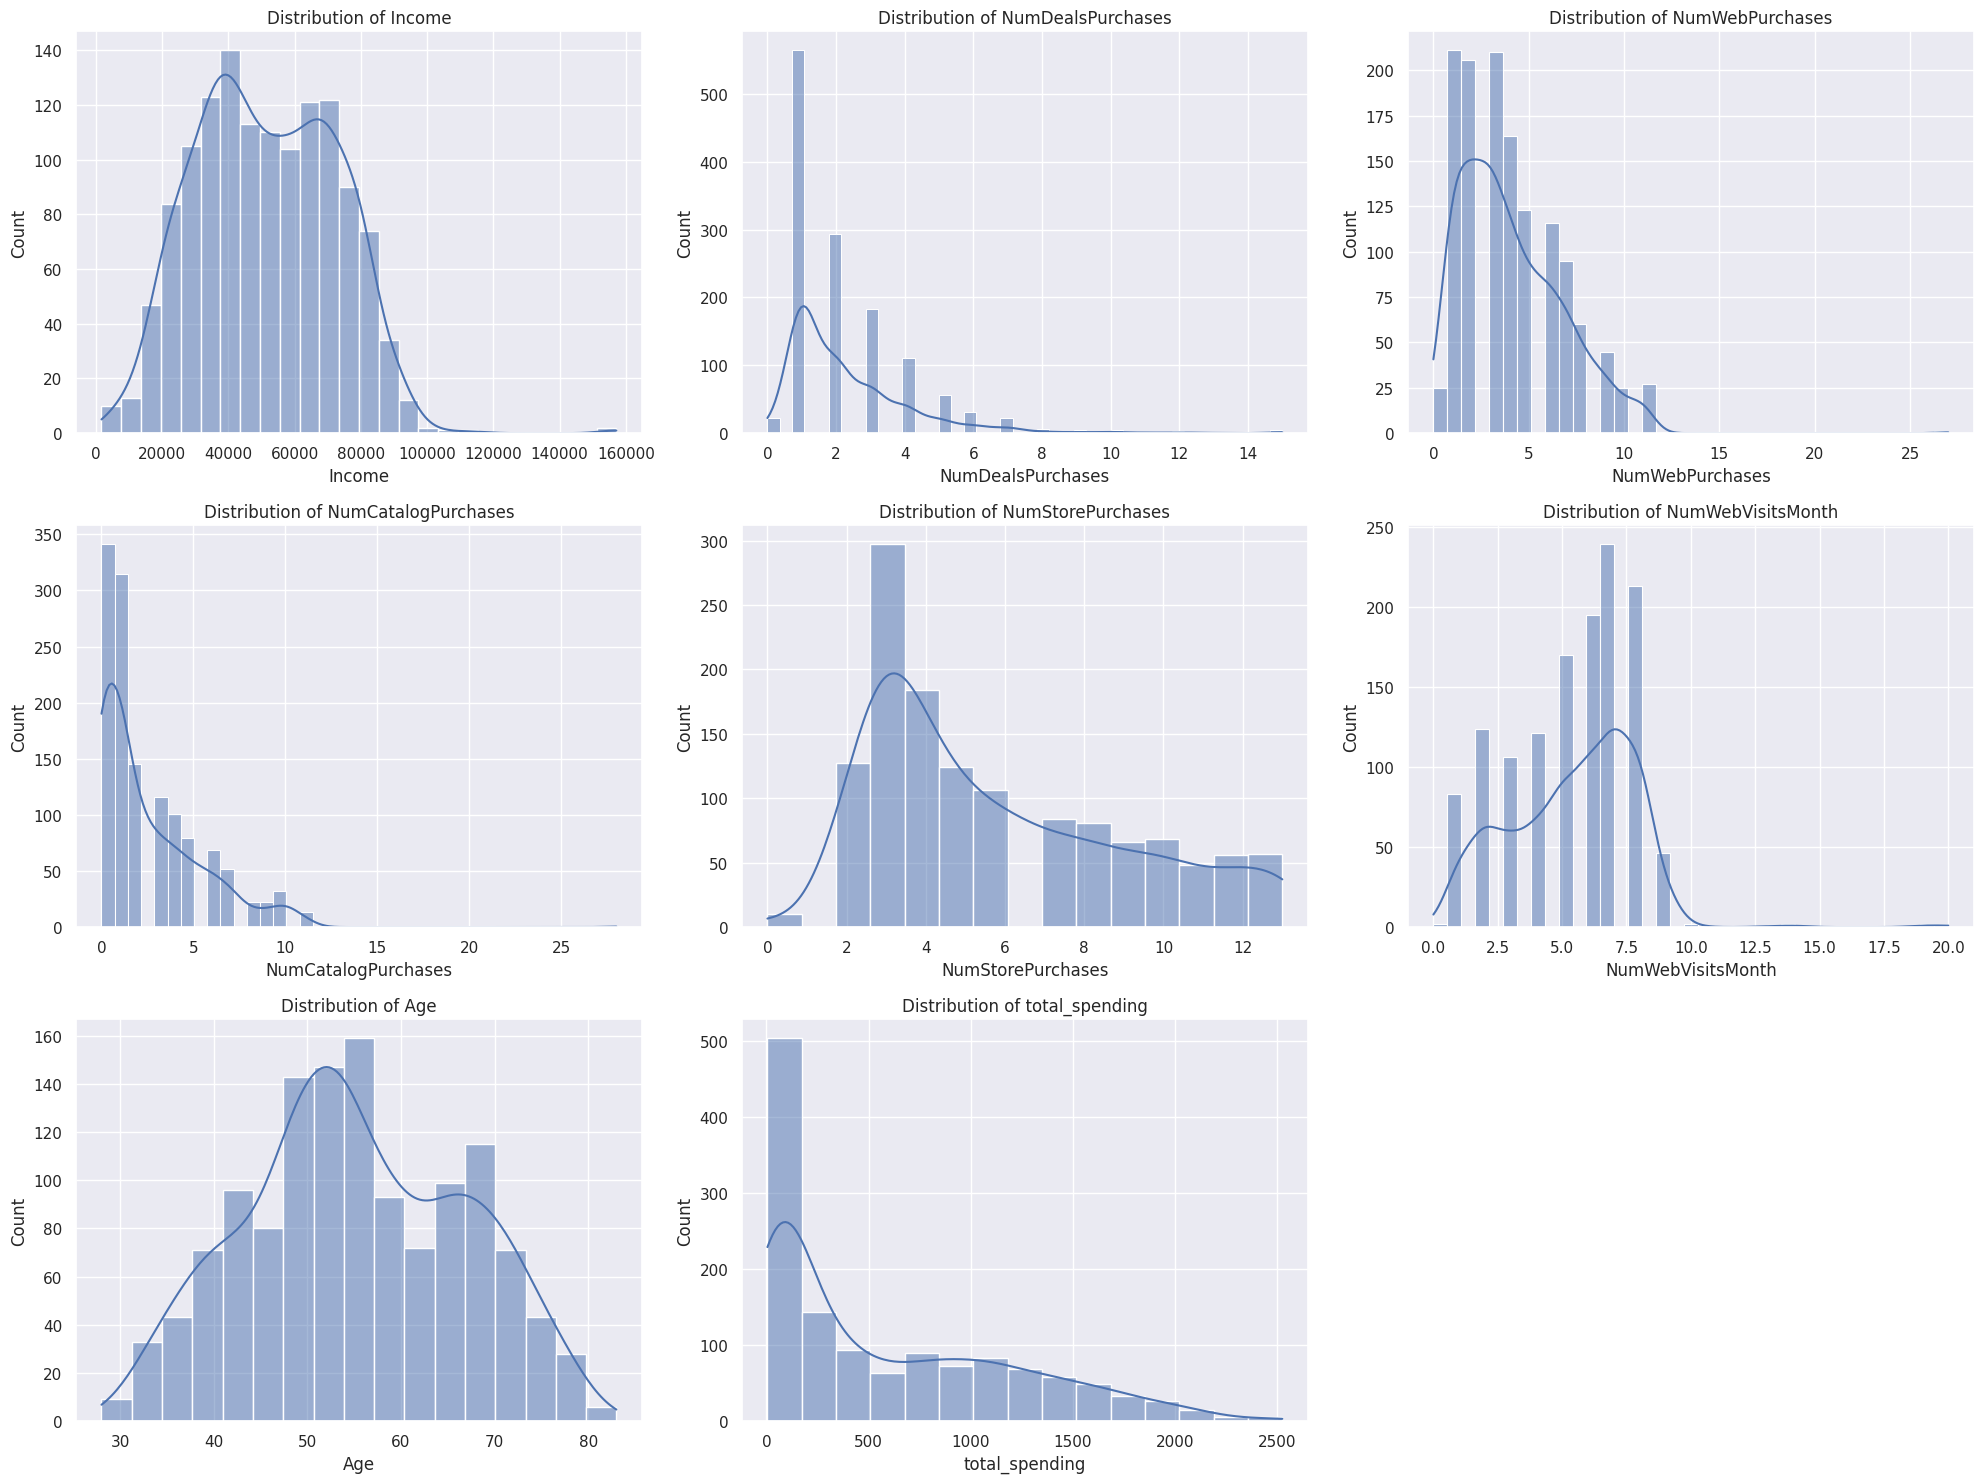

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define important numerical columns
important_numerical_columns = ['Income', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                               'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'total_spending']

# Set up the figure
plt.figure(figsize=(20, 15))
sns.set(color_codes=True)

# Plot distribution for each important numerical column
for index, col in enumerate(important_numerical_columns):
    plt.subplot(3, 3, index + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [36]:
# List of columns for which skewness needs to be calculated
columns_to_check = ['Year_Birth', 'Income', 'NumDealsPurchases', 'NumWebPurchases',
                    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                    'Age', 'total_spending']

# Loop through each column and calculate skewness
for col in columns_to_check:
    skewness = df[col].skew()
    print(f"Skewness of {col}: {skewness}")


Skewness of Year_Birth: -0.04538184478214389
Skewness of Income: 0.21859218798561586
Skewness of NumDealsPurchases: 2.4566232530930554
Skewness of NumWebPurchases: 1.0884570433215892
Skewness of NumCatalogPurchases: 1.6036695828286183
Skewness of NumStorePurchases: 0.7224147063304396
Skewness of NumWebVisitsMonth: 0.3008672655387497
Skewness of Age: 0.04538184478213289
Skewness of total_spending: 0.8931994906726313


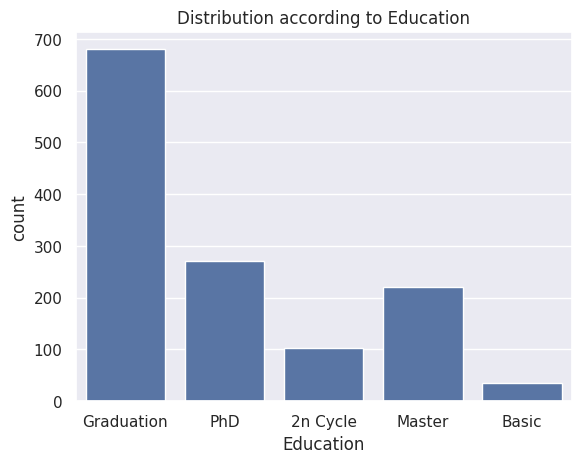

In [37]:
# Plot the distribution by Education
sns.countplot(x='Education', data=df)
plt.title('Distribution according to Education')
plt.show()

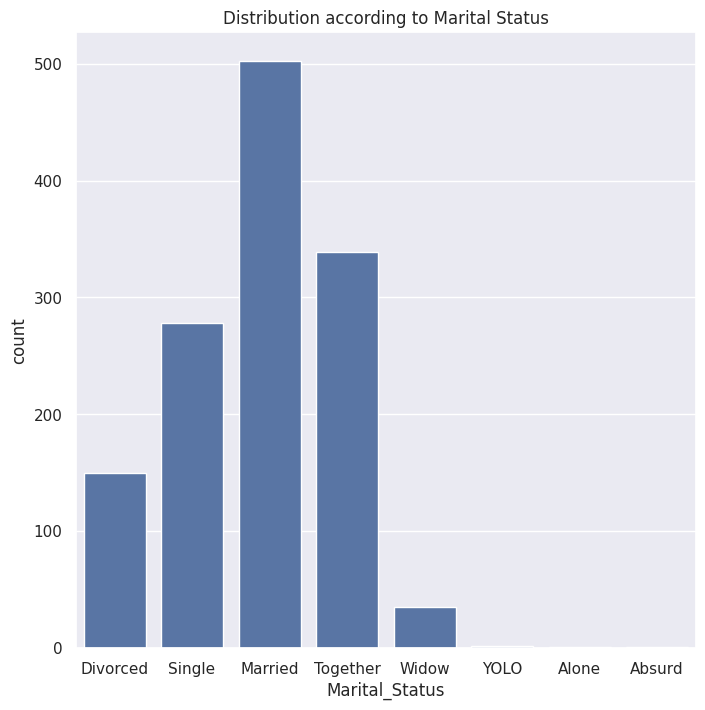

In [38]:
# Plot the distribution by Marital Status
plt.figure(figsize=(8, 8))
sns.countplot(x='Marital_Status', data=df)
plt.title('Distribution according to Marital Status')
plt.show()

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

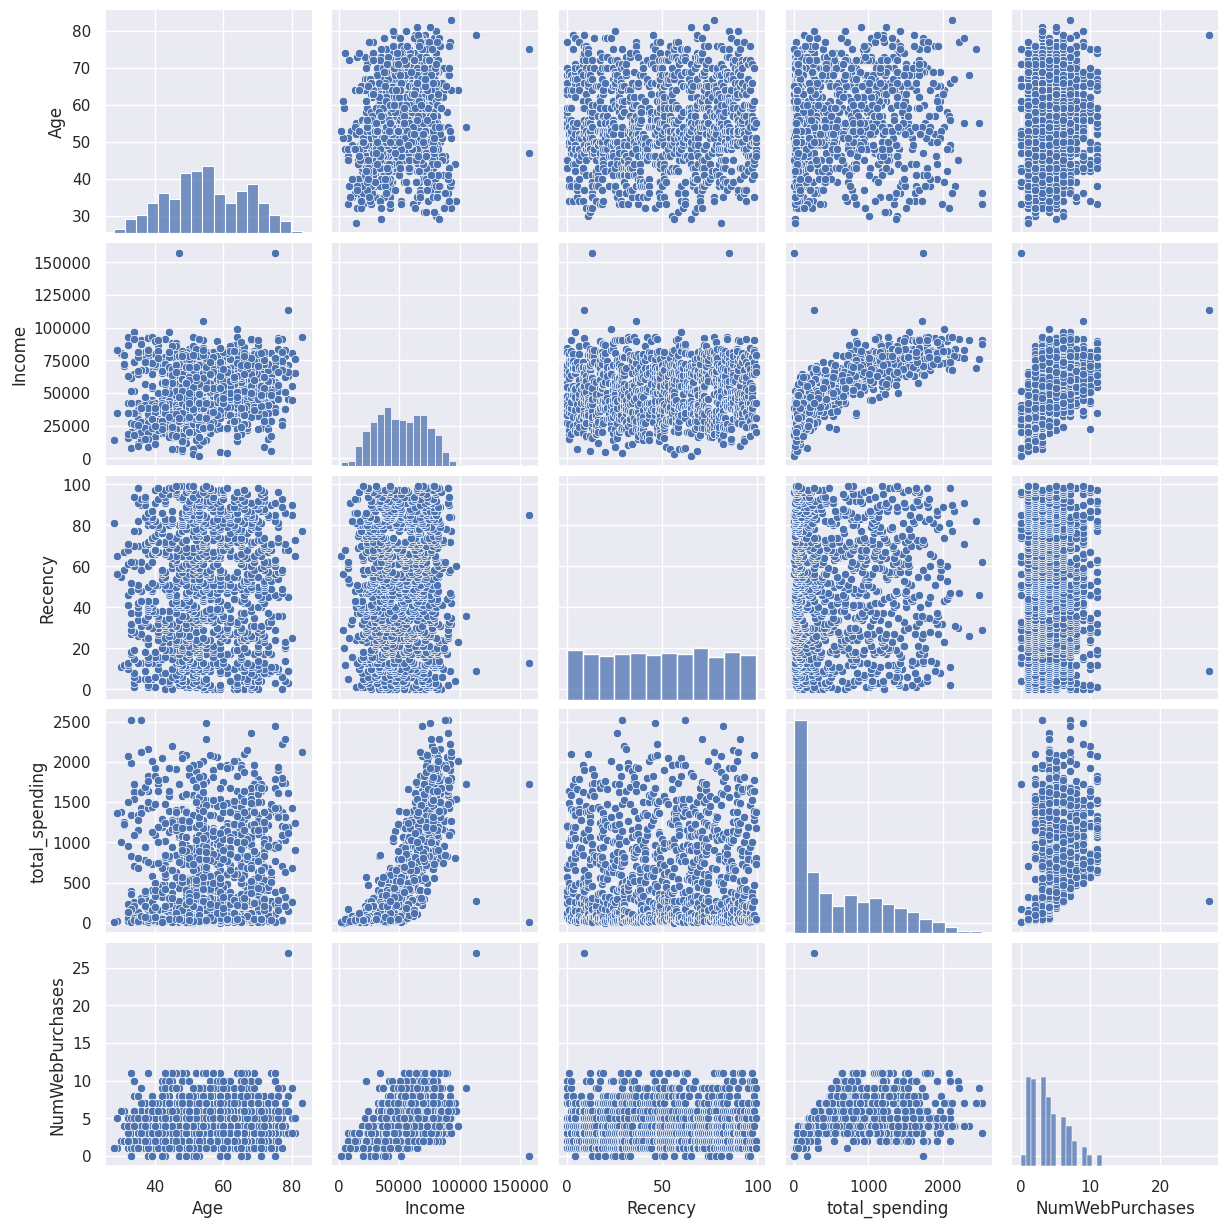

In [39]:
from datetime import datetime

# Calculate Age
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

# Select relevant columns for segmentation
segmentation_data = df[['Age', 'Income', 'Recency', 'total_spending', 'NumWebPurchases']]

# Inspect data distributions
sns.pairplot(segmentation_data)
plt.show()

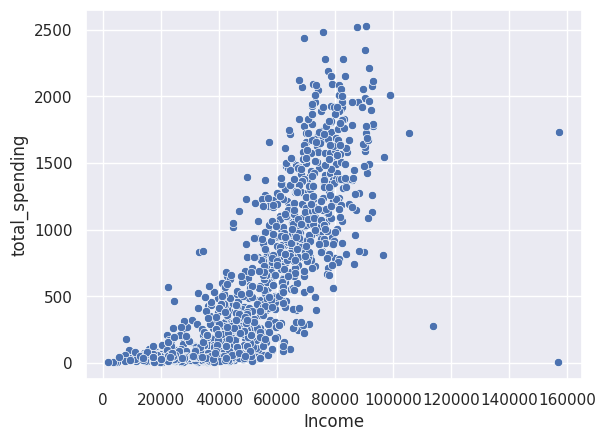

In [43]:
#The scatterplot shows that as income increases, the total amount spent also tends to increase. However, there are some outliers in the plot.
sns.scatterplot(data = df, x = 'Income', y = 'total_spending')
plt.show()

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

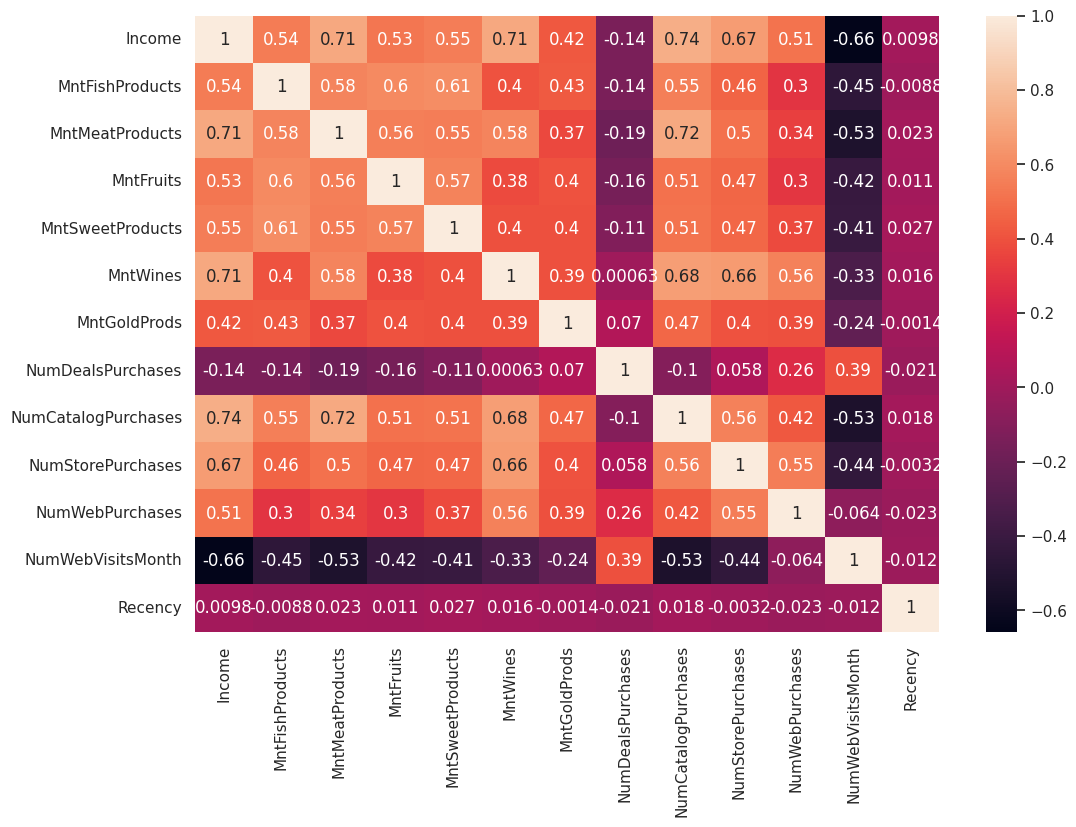

In [44]:
# Select important columns
important_columns = df[['Income', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts',
                        'MntWines', 'MntGoldProds', 'NumDealsPurchases', 'NumCatalogPurchases',
                        'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Recency']]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data=important_columns.corr(), annot=True)
plt.show()

### **Conclusion:**

Based on the insights gathered from the analysis:

1. **Age Distribution**: The age distribution of customers indicates that there is a wide range of age groups present in the dataset, with the majority of customers falling within certain age brackets.

2. **Education Distribution**: The education distribution shows the level of education among customers, providing insights into the educational background of the target audience.

3. **Marital Status Distribution**: Understanding the marital status distribution helps in segmenting the customer base and tailoring marketing strategies accordingly.

4. **Income Distribution**: The income distribution provides insights into the purchasing power of customers, which is crucial for targeting high-value segments.

5. **Total Spending**: Analyzing total spending on various products reveals patterns in consumer behavior and preferences, helping in product planning and marketing strategies.

6. **Skewness Analysis**: Skewness analysis of key variables such as income and purchase quantities provides insights into the distribution of data and potential outliers.

7. **Segmentation Analysis**: The pairplot visualization allows for an in-depth analysis of the relationship between different variables, aiding in customer segmentation and targeted marketing efforts.

8. **Correlation Analysis**: The heatmap visualization of correlation among important columns highlights potential relationships between variables, guiding further analysis and decision-making.

In conclusion, these insights provide valuable information for understanding customer demographics, behavior, and preferences, which can be leveraged to optimize marketing strategies, improve product offerings, and enhance overall customer satisfaction and loyalty.

### **Recommendations:**

1. **Target Specific Age Groups with Higher Potential**: Concentrate your marketing efforts on clients aged 25 to 54. This demographic segment typically represents individuals in their prime earning and spending years. They are likely to have stable income levels and significant purchasing power, making them lucrative targets for your marketing campaigns.

2. **Focus on Educated and Married Customers**: Within the target age group, prioritize marketing efforts towards customers who hold a degree and are married. These individuals are often more financially secure, have established purchasing habits, and may be more receptive to your products or services. Tailor your messaging and offers to resonate with their lifestyle and needs.

3. **Incentivize Increased Purchases**: Implement additional discounts, promotions, or loyalty programs to encourage clients to make more purchases. Offer exclusive deals or rewards for repeat purchases to incentivize customer loyalty and drive higher sales volumes. By providing value-added incentives, you can stimulate demand and increase customer engagement.

4. **Enhance Online Shopping Experience**: Improve the company's website and online exposure to make the online purchasing procedure easier and more seamless for customers. Streamline the checkout process, optimize website navigation, and ensure mobile compatibility to enhance user experience. Invest in digital marketing strategies to increase online visibility and attract more customers to your online platform.

5. **Utilize Customer Behavior Insights**: Use customer behavior and purchase history tracking to identify and capitalize on developing trends and patterns. Analyze customer data to understand their preferences, buying habits, and interactions with your brand. Leverage this information to personalize marketing campaigns, recommend relevant products, and anticipate future needs. By staying attuned to customer behavior, you can adapt your strategies in real-time and stay ahead of the competition.

In summary, by focusing your marketing efforts on specific demographic segments, incentivizing increased purchases, optimizing the online shopping experience, and leveraging customer behavior insights, you can drive growth, enhance customer satisfaction, and ultimately achieve business success.